In [116]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob
from scipy import stats

sys.path.append('../../')
from utils import dataframe_utils, clustering_utils

In [117]:
# norm_type = 'min_max'
norm_type = 'z_score'

microarray_data_pattern = f'./2024-08-08_microarray/{norm_type}/**/*.csv'

rna_seq_data_pattern = f'./2024-08-08_rna_seq/{norm_type}/**/*.csv'

microarray_stats_files = glob.glob(microarray_data_pattern)

rna_seq_stats_files = glob.glob(rna_seq_data_pattern)

microarray_stats_df = dataframe_utils.csv_files_to_df(microarray_stats_files)

rna_seq_stats_df = dataframe_utils.csv_files_to_df(rna_seq_stats_files)

In [118]:
microarray_stats_files

['./2024-08-08_microarray/z_score/nc/microarray_z_score_NC_manhattan_3_2024-08-13_00-25-21.934118_scan_stats.csv',
 './2024-08-08_microarray/z_score/nc/microarray_TNC_manhattan_3_2024-08-09_02-20-50.230862_scan_stats.csv',
 './2024-08-08_microarray/z_score/nc/microarray_TNC_manhattan_3_2024-08-09_02-20-50.230342_scan_stats.csv',
 './2024-08-08_microarray/z_score/exp/microarray_EXP_manhattan_11_2024-08-08_12-45-00.866848_scan_stats.csv',
 './2024-08-08_microarray/z_score/exp/microarray_EXP_manhattan_10_2024-08-08_12-45-00.866844_scan_stats.csv',
 './2024-08-08_microarray/z_score/exp/microarray_EXP_manhattan_6_2024-08-08_12-45-00.866945_scan_stats.csv',
 './2024-08-08_microarray/z_score/exp/microarray_EXP_manhattan_5_2024-08-08_12-45-00.866691_scan_stats.csv',
 './2024-08-08_microarray/z_score/exp/microarray_EXP_manhattan_9_2024-08-08_12-45-00.866757_scan_stats.csv',
 './2024-08-08_microarray/z_score/exp/microarray_EXP_manhattan_12_2024-08-08_12-48-57.385263_scan_stats.csv',
 './2024-08-

In [119]:
rna_seq_stats_files

['./2024-08-08_rna_seq/z_score/nc/rna_seq_TNC_manhattan_3_2024-08-09_02-20-50.230401_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/nc/rna_seq_z_score_NC_manhattan_3_2024-08-13_00-25-21.540654_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/nc/rna_seq_TNC_manhattan_3_2024-08-09_02-20-50.212611_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/nc/rna_seq_z_score_NC_manhattan_3_2024-08-14_22-45-38.802633_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/exp/rna_seq_EXP_manhattan_12_2024-08-08_02-55-57.093354_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/exp/rna_seq_EXP_manhattan_9_2024-08-08_02-55-39.586881_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/exp/rna_seq_EXP_manhattan_7_2024-08-08_02-55-24.575286_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/exp/rna_seq_EXP_manhattan_10_2024-08-08_02-55-42.258753_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/exp/rna_seq_EXP_manhattan_2_2024-08-08_02-50-02.343323_scan_stats.csv',
 './2024-08-08_rna_seq/z_score/exp/rna_seq_EXP_manhattan_8_20

In [120]:
microarray_stats_df['fraction_clusters_enriched'] = microarray_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [121]:
rna_seq_stats_df['fraction_clusters_enriched'] = rna_seq_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [122]:
rna_seq_stats_df.shape, microarray_stats_df.shape

((5248, 34), (5470, 34))

z_score
1000 1000
-0.03220774817771783 -0.03424952835803042
2.362657031923441e-06 2.5203632239385893e-06
Distribution Comparision - T-statistic: -205.83779843399887, P-value: 0.0
EXP to Simulated - Z-score: 2.878597956359088, P-value: 0.003994472067579302
EXP to Scrambled - Z-score: 12.33549951564509, P-value: 0.0


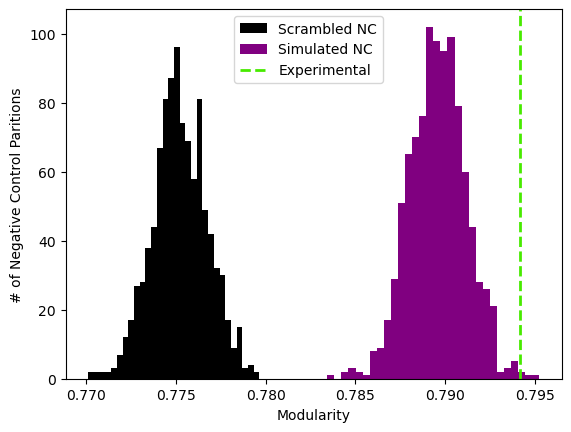

1000 1000
0.07634741624565715 0.0616290456156548
2.0219101607301476e-06 2.346344163165016e-06
Distribution Comparision - T-statistic: -82.1117164965511, P-value: 0.0
EXP to Simulated - Z-score: 68.65048465188832, P-value: 0.0
EXP to Scrambled - Z-score: 77.77198985512305, P-value: 0.0


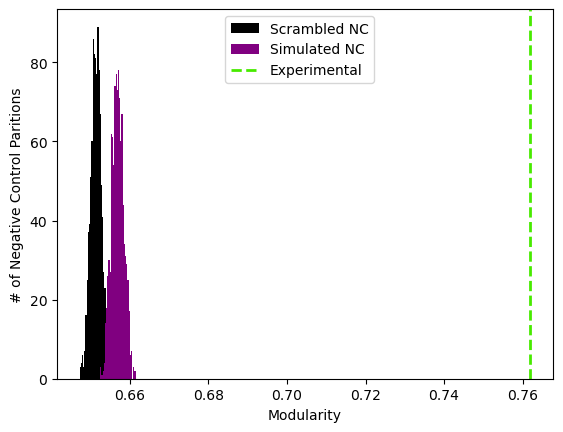

In [123]:
import statistics

np.random.seed(seed=42)

dfs = {'rna_seq': rna_seq_stats_df, 'microarray': microarray_stats_df}

print(norm_type)

for name, df_stats in dfs.items():

    df_stats_exp = df_stats.loc[
        (df_stats['partition_type'] == 'EXP')
        &
        (df_stats['metric'] == 'manhattan')
        &
        (df_stats['nns'] == 3)
        &
        (df_stats['parameter'] == 0.005)
                                ]
    
    df_stats_nc = df_stats.loc[df_stats['partition_type'] == 'NC']
    df_stats_tnc = df_stats.loc[df_stats['partition_type'] == 'TNC']
    # hist_clustering_metric = 'silhouette_score'
    hist_clustering_metric = 'modularity'

    hist_data = np.random.choice(list(df_stats_nc[hist_clustering_metric].values), 1000, replace=False) 
    # hist_data = df_stats_nc[hist_clustering_metric].values
    hist_data_tnc = np.random.choice(list(df_stats_tnc[hist_clustering_metric].values), 1000, replace=False) 
    # hist_data_tnc = df_stats_tnc[hist_clustering_metric].values
    exp_line_at_x = df_stats_exp[hist_clustering_metric].values[0]
    exp_line_at_x
    # tnc_line_at_x = df_stats_tnc[hist_clustering_metric].values[0]
    # tnc_line_at_x

    print(len(hist_data), len(hist_data_tnc))

    print(stats.skew(hist_data), stats.skew(hist_data_tnc))

    print(statistics.variance(hist_data), statistics.variance(hist_data_tnc))

    # Create the histogram
    plt.hist(hist_data, bins=30, color='black', label='Scrambled NC')
    plt.hist(hist_data_tnc, bins=30, color='purple', label='Simulated NC')

    t_stat, p_value = stats.ttest_ind(hist_data, hist_data_tnc)
    print(f"Distribution Comparision - T-statistic: {t_stat}, P-value: {p_value}")

    # Calculate z-score
    z_score = (exp_line_at_x - np.mean(hist_data_tnc)) / np.std(hist_data_tnc)
    # Calculate p-value for a two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    print(f"EXP to Simulated - Z-score: {z_score}, P-value: {p_value}")

    # Calculate z-score
    z_score = (exp_line_at_x - np.mean(hist_data)) / np.std(hist_data)
    # Calculate p-value for a two-tailed test
    p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))
    print(f"EXP to Scrambled - Z-score: {z_score}, P-value: {p_value}")

    # Add a vertical line at the specified x value
    # plt.axvline(x=exp_line_at_x, color='red', linestyle='dashed', linewidth=2, label='EXP at x={} ($P$ < 0.001)'.format(round(exp_line_at_x, 2)))
    # plt.axvline(x=tnc_line_at_x, color='blue', linestyle='dashed', linewidth=2, label='TNC at x={}'.format(round(tnc_line_at_x, 2)))
    plt.axvline(x=exp_line_at_x, color='#47EA00', linestyle='dashed', linewidth=2, label='Experimental')
    # plt.axvline(x=tnc_line_at_x, color='purple', linestyle='dashed', linewidth=2, label='TNC')


    # Add labels and title
    plt.xlabel(hist_clustering_metric.capitalize())
    plt.ylabel('# of Negative Control Paritions')
    # plt.title(f'{len(hist_data)} Neg. Controls vs. Experimental {hist_clustering_metric.capitalize()} Distribution')

    plt.legend(bbox_to_anchor=(0.325, 1))

    plt.savefig(f'{name}_{norm_type}_mod_plot.svg', format='svg')

    plt.show()

In [124]:
df_stats_nc['silhouette_score'].mean()

-0.056217167389195626

In [125]:
df_stats_nc['silhouette_score'].median()

-0.055959115729918

In [126]:
df_stats_nc['silhouette_score'].max()

-0.0518338624775459

In [127]:
df_stats_nc['modularity'].mean()

0.6514547253763037

In [128]:
df_stats_nc['modularity'].median()

0.6514528412646657

In [129]:
df_stats_nc['modularity'].max()

0.6563764165895541

In [130]:
nc_mean = df_stats_nc[hist_clustering_metric].mean()
nc_std = df_stats_nc[hist_clustering_metric].std()

nc_se = nc_std / (np.sqrt(len(hist_data)))

nc_mean, nc_std, nc_se

(0.6514547253763037, 0.0014404111666347494, 4.5549800537061405e-05)

In [131]:
t_stat = (exp_line_at_x - nc_mean) / nc_se

d_freedom = len(hist_data) - 1

t_stat, d_freedom

(2426.6963127175445, 999)

In [132]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
p_value

0.0

In [133]:
p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)
p_value

0.0

In [134]:
alpha = 0.05
alpha

0.05

In [135]:
p_value < alpha

True